In [1]:
import shutil, random, os
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# This is small data set path for testing purpose
# dirpath="/home/sultan/EEG/Source_Level_Analysis/test_csv_evoke/"
#dirpath="/home/sultan/EEG/Source_Level_Analysis/test_csv_evoke/"
# dirpath="/home/sultan/EEG/Source_Level_Analysis/Source_ERP/Small_data_test/"
#dirpath='/home/sultan/EEG/Source_Level_Analysis/Source_ERP/Small_data_test/S1/Event_1/'
#dirpath='/home/sultan/EEG/Source_Level_Analysis/Extracted_CSV_Source_Dk_data/'
# dirpath='/home/sultan/EEG/Source_Level_Analysis/Source_ERP/Small_data_test/S1/Event_1/S1/Event_1/'
despath="/home/sultan/EEG/Source_Level_Analysis/csv_write_test/"

# Function for averaging the trial

In [21]:
def doAvgSave(chunk,fname):
    df1 = pd.read_csv(chunk[0])
    tmp = df1.copy()
    tmp = tmp.drop(columns=['cc1'] )
    #print tmp
    for c in range(1,len(chunk)):
        tmp1 = pd.read_csv(chunk[c])
        tmp1 = tmp1.drop(columns=['cc1'] )
        tmp = tmp + tmp1 # add those
        #print chunk[i]
    tmpd = tmp.div(len(chunk)) # average
#     plt.plot(tmp.iloc[8,1:].values)
#     plt.grid(True)
#     plt.show()

    df1.update(tmpd) # this is the new data frame with average 
    # write to some location 
    #df1.to_csv(fname+'.csv')
    j2=0; k2=5; ad=[];
    for i2 in range(0,21):
#         print i2
        da=tmpd.iloc[:,j2:k2]
#     print j,k
        j2=j2+5; k2=k2+5
        ax=da.mean(axis=1)
        ad.append(ax)
    ddrf=pd.DataFrame(ad)
    dtr=ddrf.T
#     print dtr
    dtr.to_csv(fname+'Avg'+'.csv')
    df1.to_csv(fname+'.csv')
    t=np.linspace(-10,200,106)
    plt.plot(t,df1.iloc[2:4,1:].values.T*1e9)
    plt.xlim(-10, 210)
    plt.grid(True)
    plt.show()

# Read the csv file and feed to the function

In [22]:
dirpath="/home/sultan/EEG/Source_Level_Analysis/Source_ERP/Small_data_test/"
dirpath='/home/sultan/EEG/Source_Level_Analysis/Extracted_CSV_Source_Dk_data/'

/home/sultan/EEG/Source_Level_Analysis/Extracted_CSV_Source_Dk_data/S1/Event_1/
59


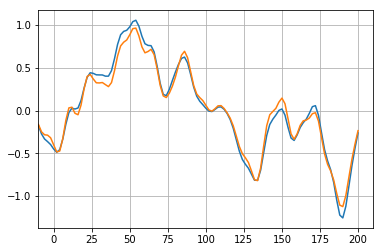

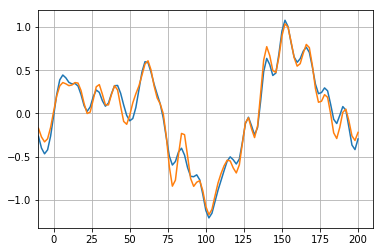

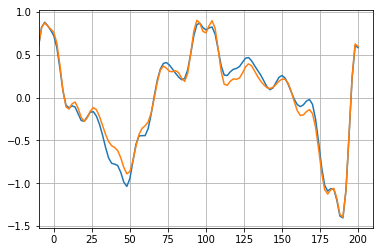

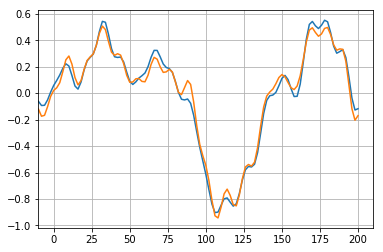

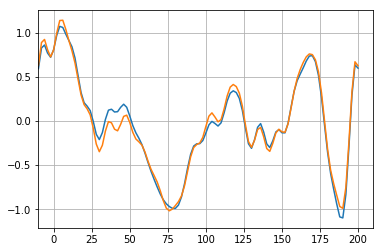

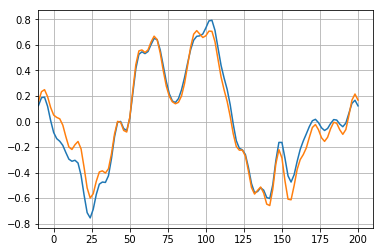

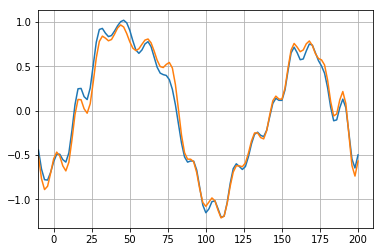

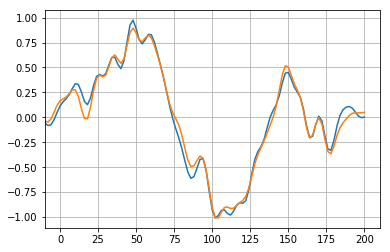

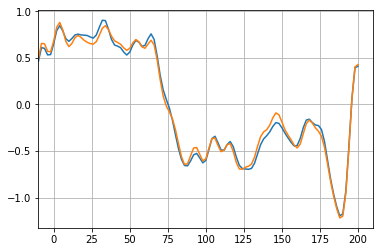

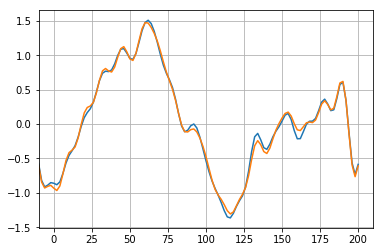

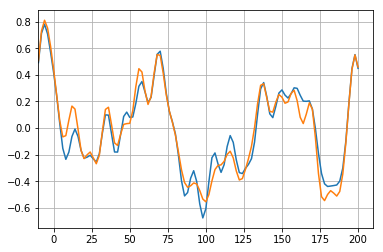

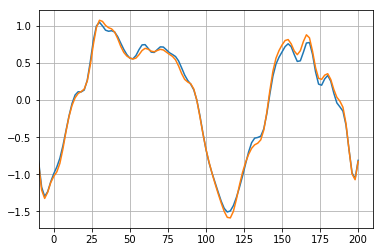

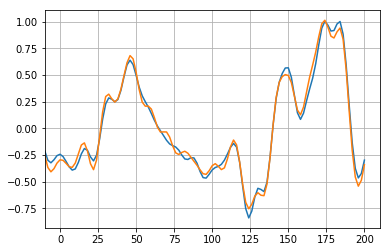

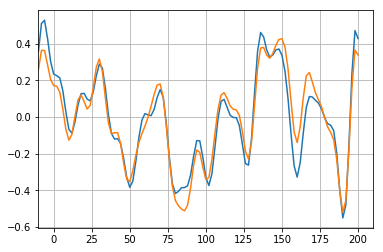

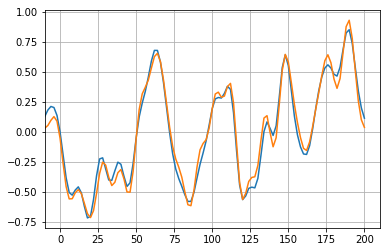

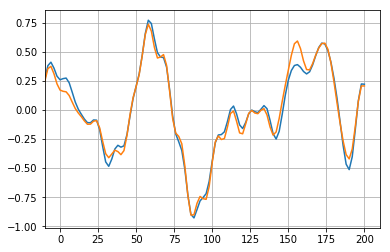

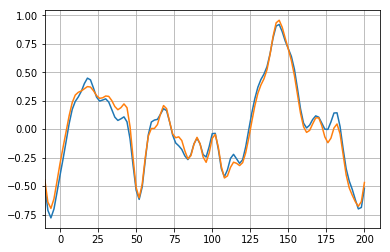

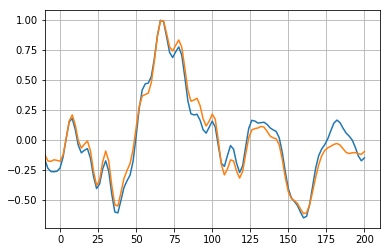

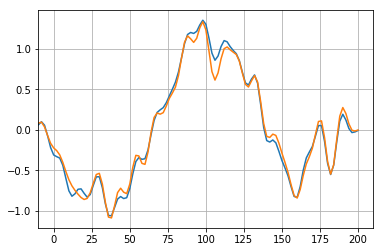

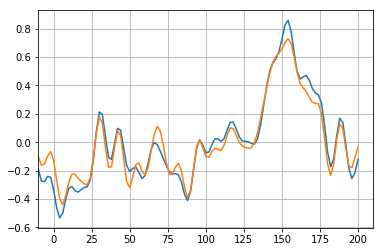

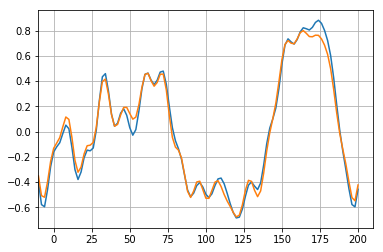

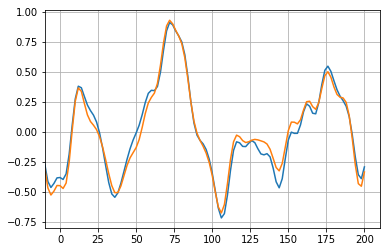

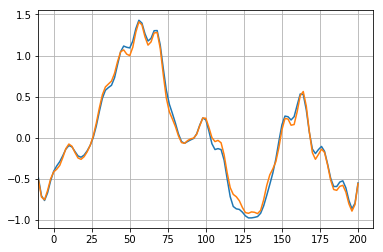

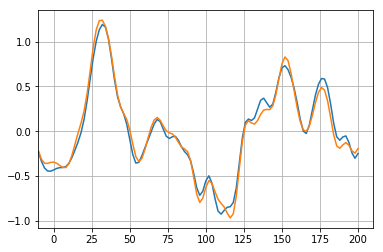

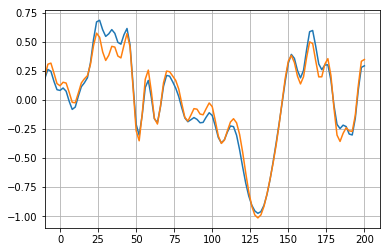

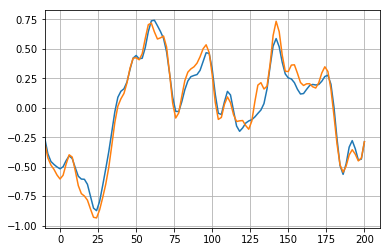

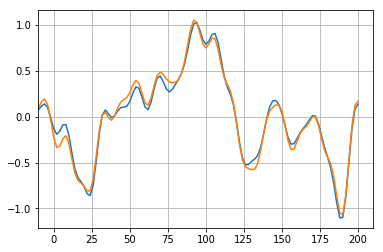

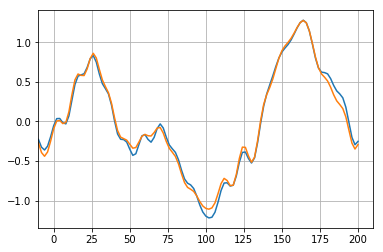

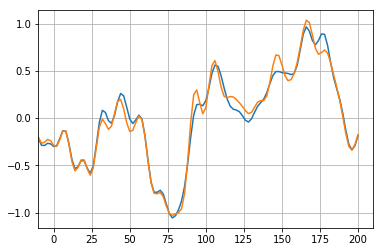

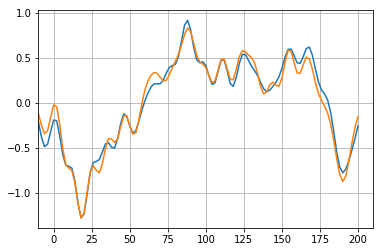

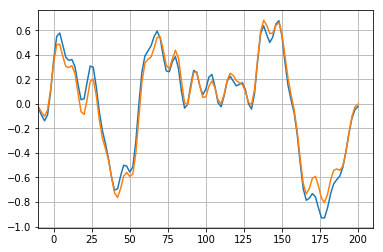

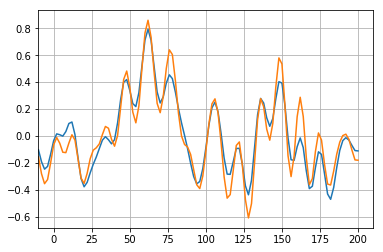

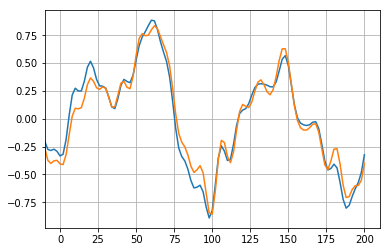

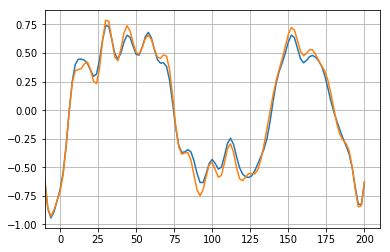

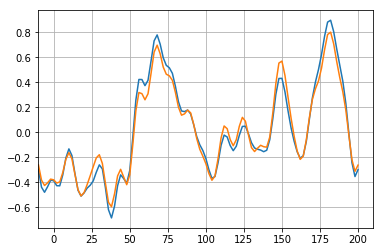

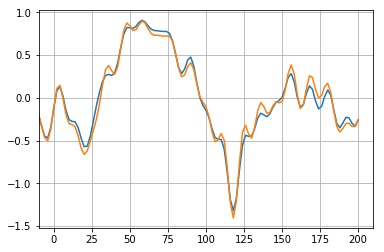

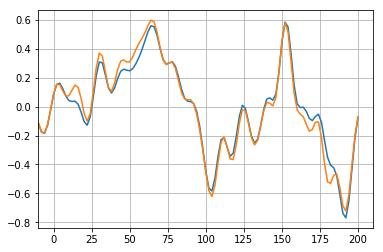

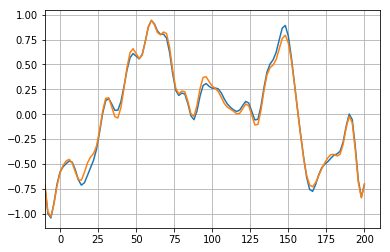

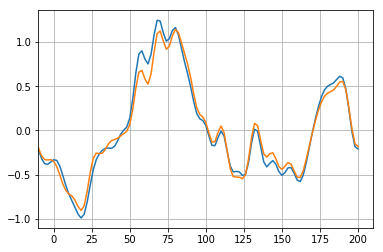

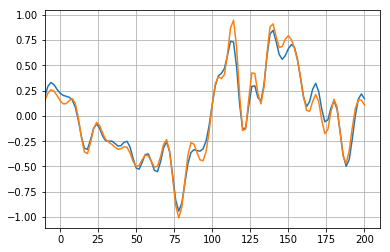

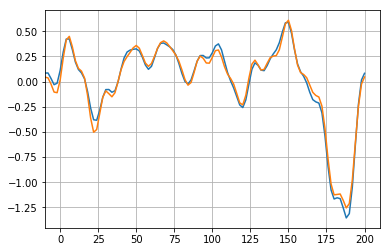

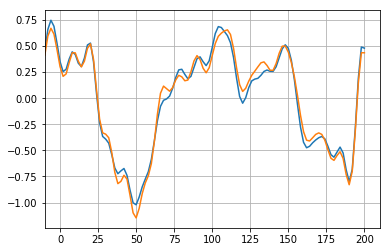

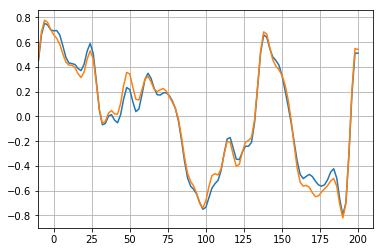

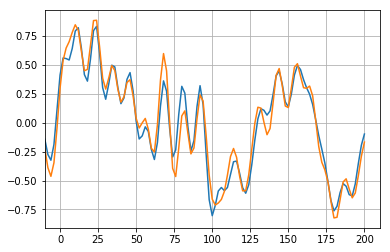

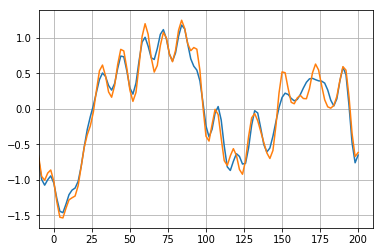

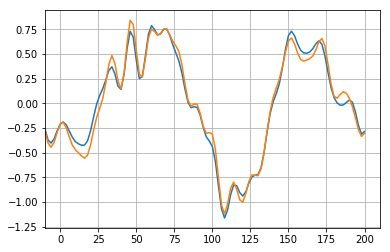

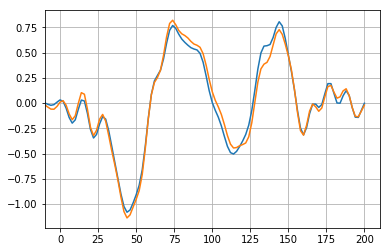

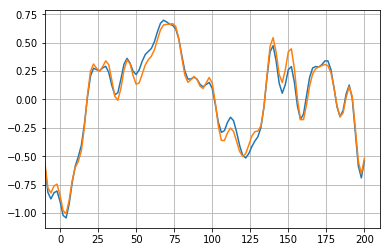

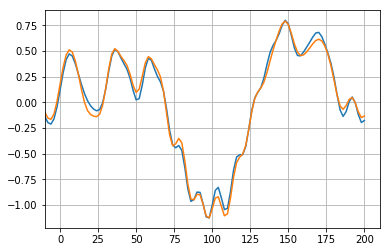

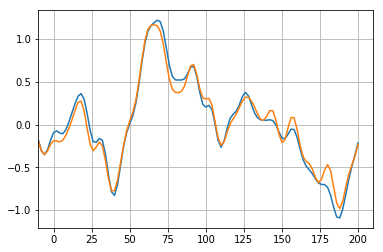

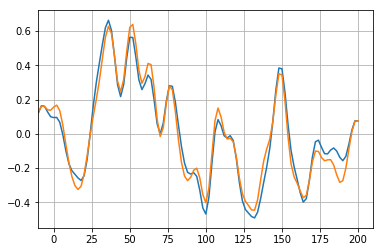

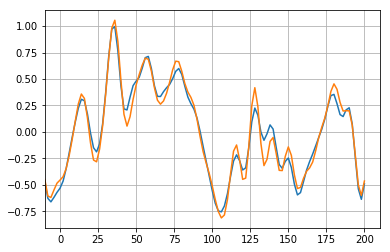

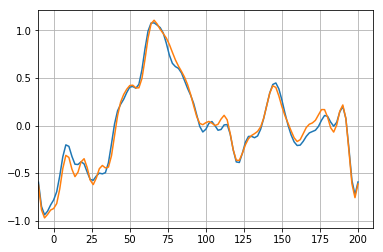

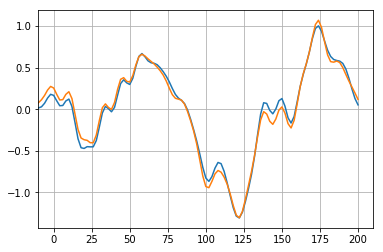

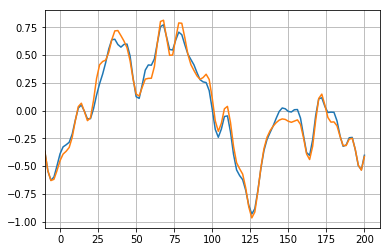

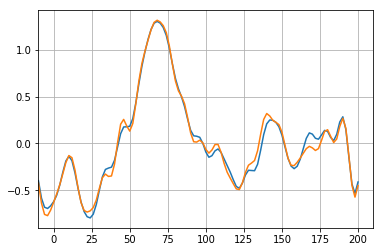

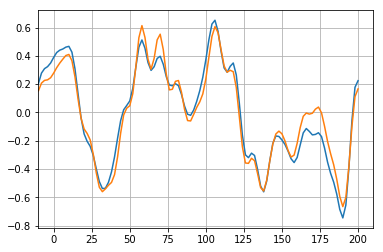

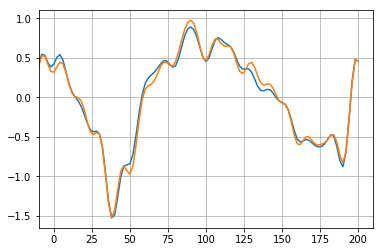

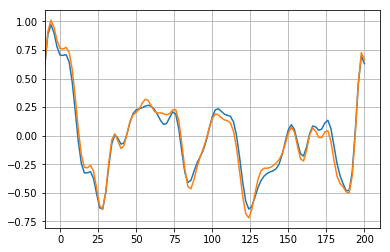

/home/sultan/EEG/Source_Level_Analysis/Extracted_CSV_Source_Dk_data/S1/Event_2/
59


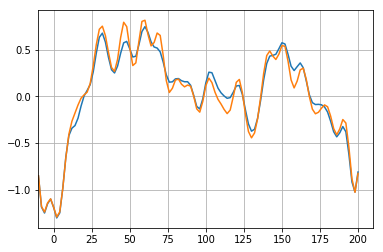

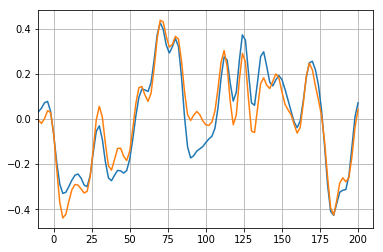

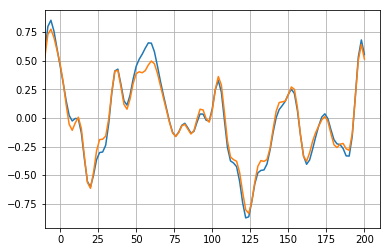

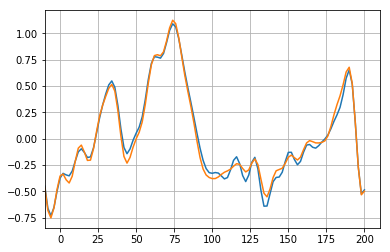

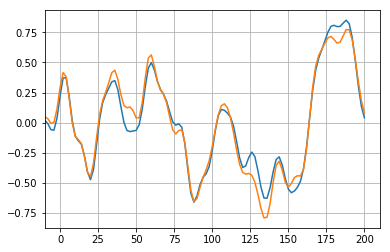

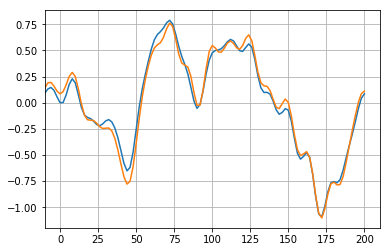

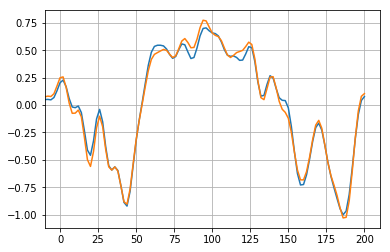

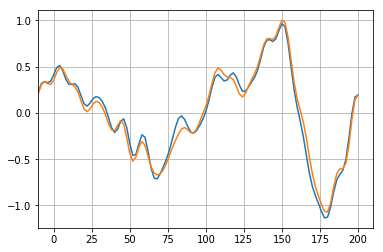

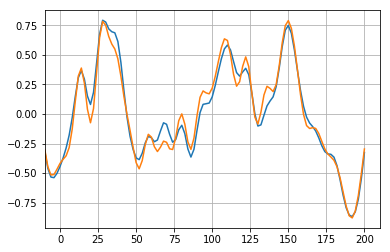

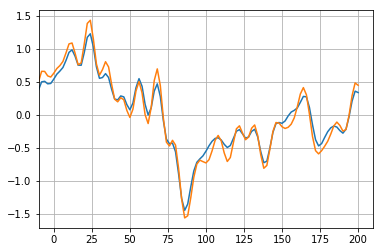

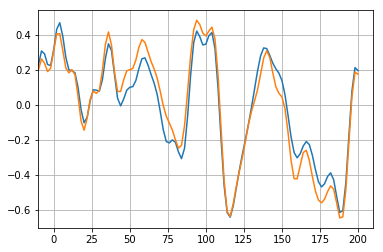

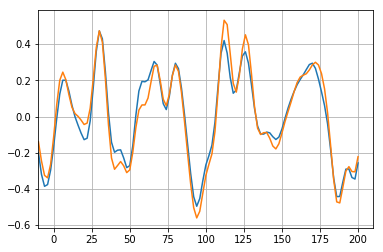

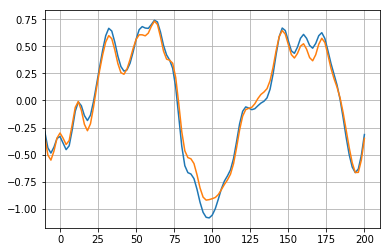

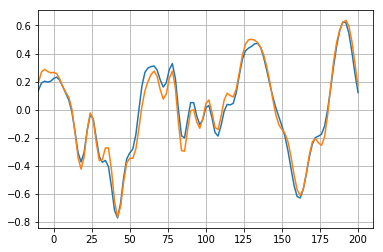

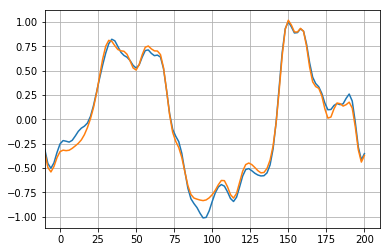

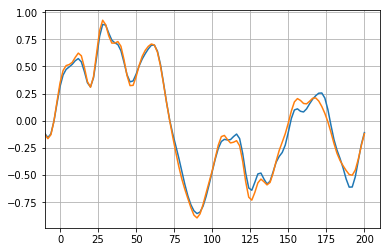

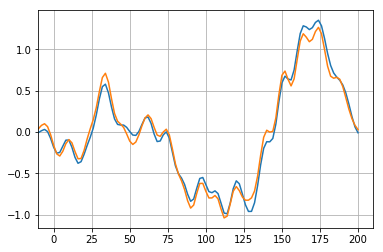

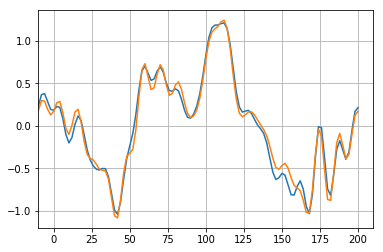

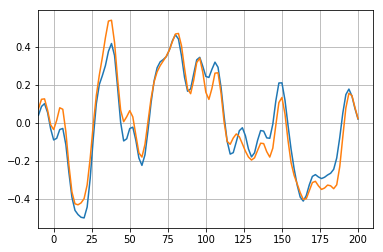

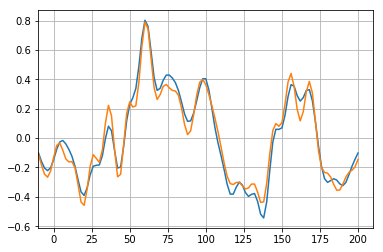

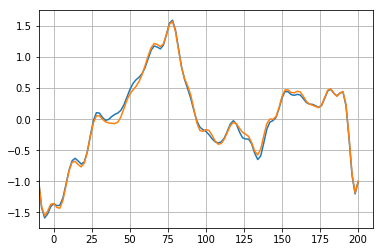

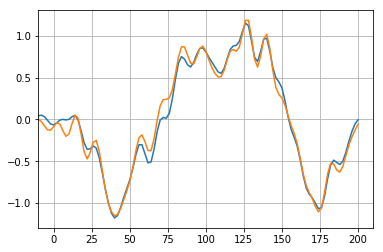

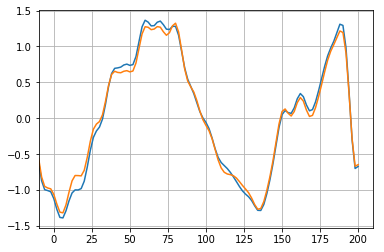

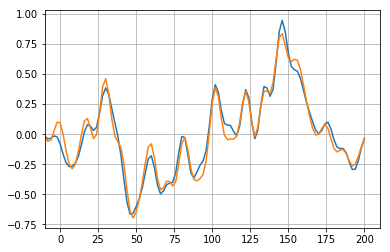

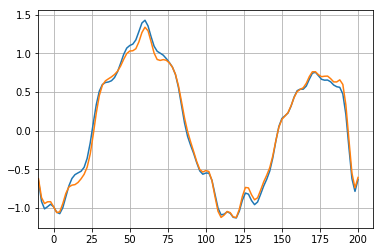

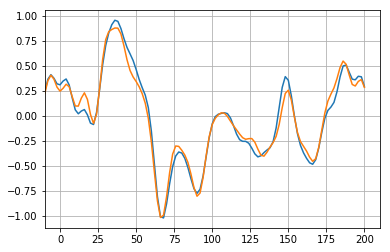

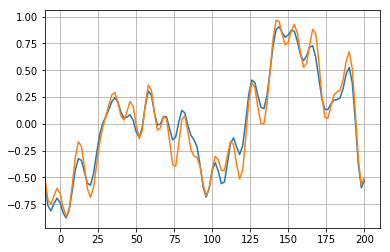

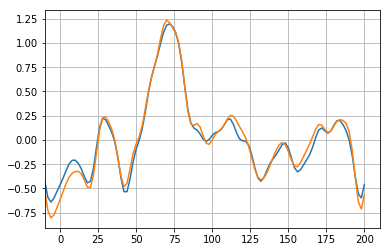

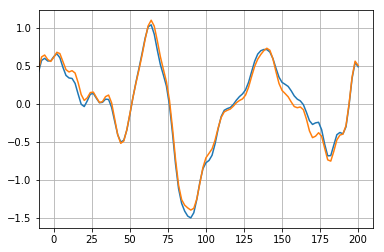

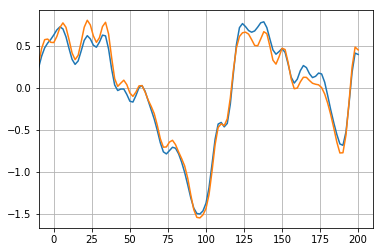

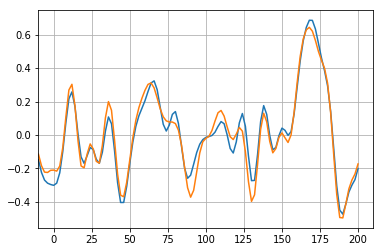

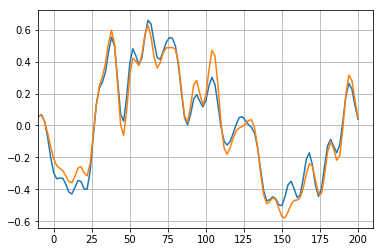

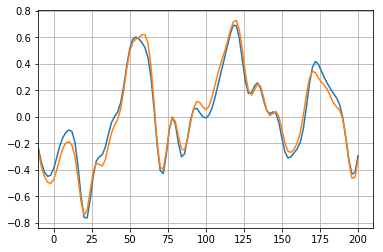

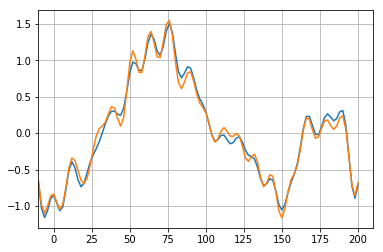

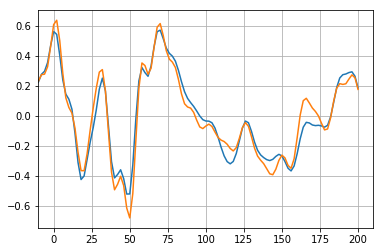

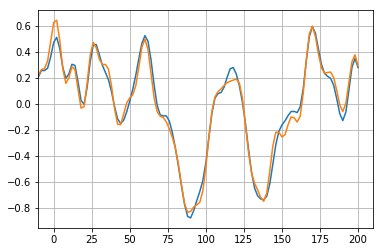

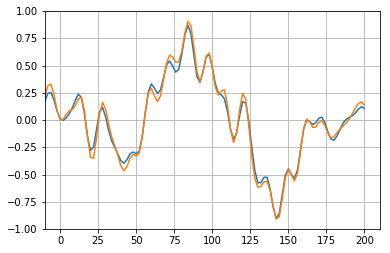

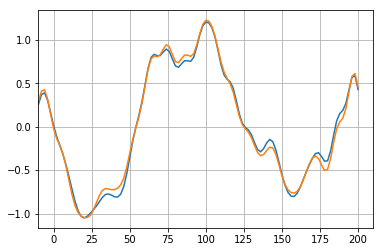

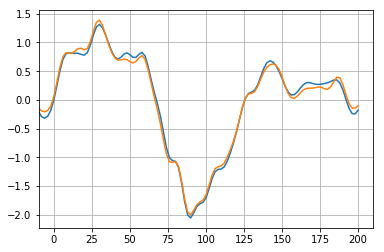

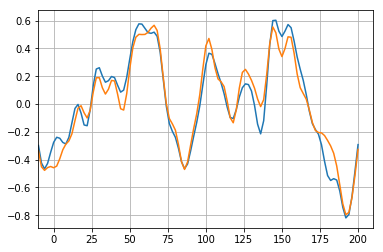

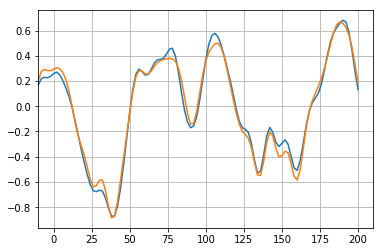

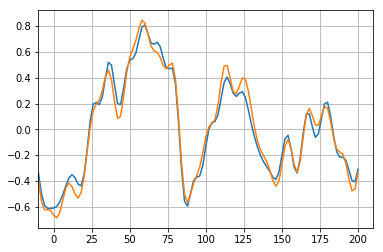

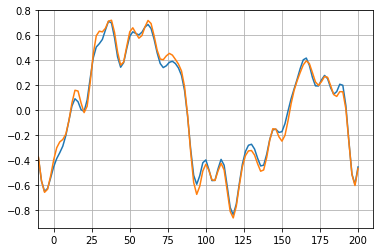

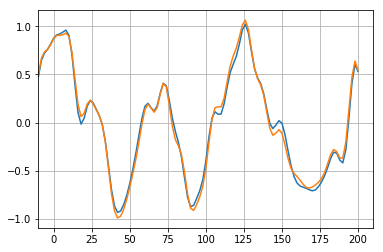

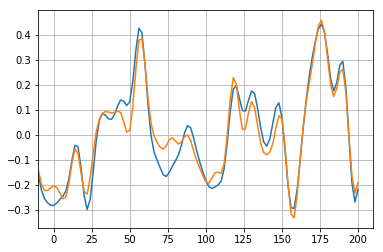

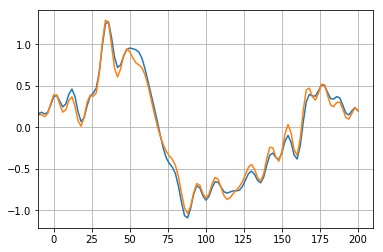

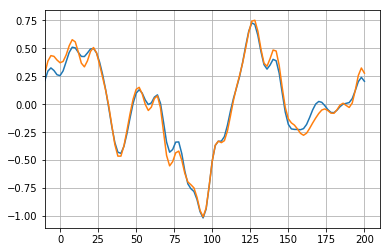

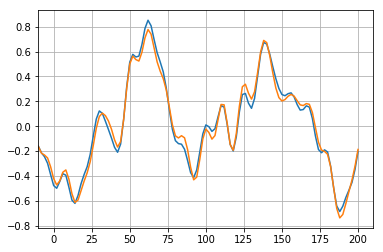

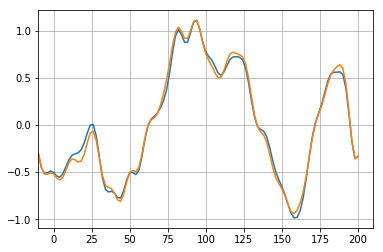

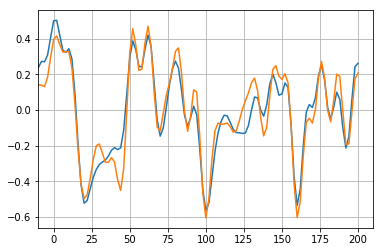

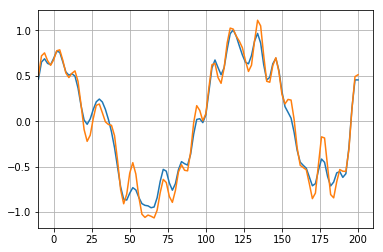

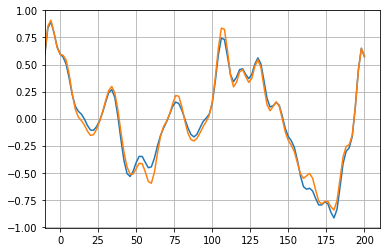

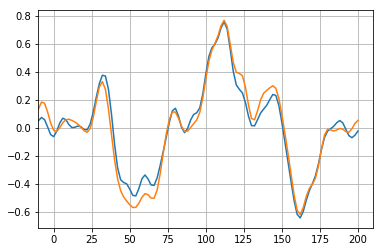

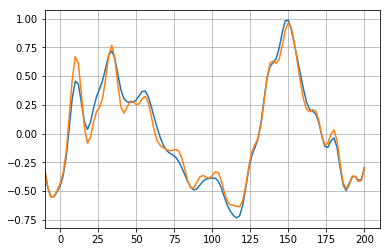

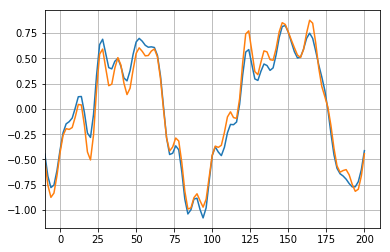

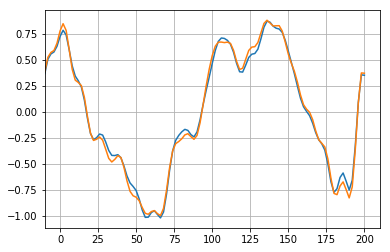

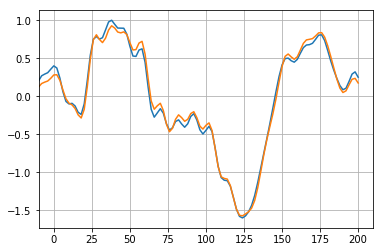

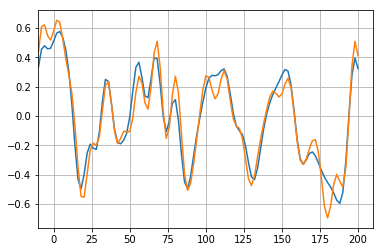

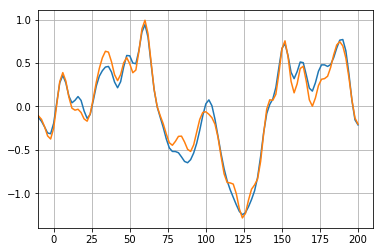

In [23]:
sub=2;# subject+1
Ev=3;#event+1
for k in range(1,sub):
    for j in range(1,Ev):
        b=dirpath+'S'+str(k)+'/'+'Event_'+str(j)+'/'
        dpin=b
        print dpin
        from os import walk
        from os.path import isfile, join
        f = []
        for (dpin, dirnames, filenames) in walk(dpin):
            f.extend(join(dpin, x) for x in filenames if x.endswith(".csv"))
            break
        #print f
        sample=50;# How many samples need to average out
        totalchunk = len(f) / sample 
        print (totalchunk)
        # test purpose 
        # totalchunk = 2
        descr=despath+'S'+str(k)+'/'+'Event_'+str(j); # Make directory 
        os.makedirs(descr)
        import numpy as np
        for i in range(totalchunk): # we will generate two at a time
            mychunk = np.random.choice(f,size=sample,replace=False)
            #print mychunk
            # make sure the chunk element does not exist in the original list 
            f = list(set(f) - set(mychunk))
            #print f
            #fname=descr+'Av'+str(i)
            #fname='S'+str(k)+'event'+str(j)+'av'+str(i)
            fname=despath+'S'+str(k)+'/'+'Event_'+str(j)+'/'+'S'+str(k)+'event'+str(j)+'av'+str(i)
            doAvgSave(mychunk,fname)

In [6]:
descr=despath+'S'+str(k)+'/'+'Event_'+str(j)+'/'+'S'+str(k)+'event'+str(j)+'av'+str(i)
descr

'/home/sultan/EEG/Source_Level_Analysis/csv_write_test/S1/Event_2/S1event2av0'

In [7]:
fname+'.csv'

'/home/sultan/EEG/Source_Level_Analysis/csv_write_test/S1/Event_2/S1event2av0.csv'

In [8]:
dirpath='/home/sultan/EEG/Source_Level_Analysis/Source_ERP/Small_data_test/S1/Event_1/'

In [9]:
from os import walk
from os.path import isfile, join
f = []
for (dirpath, dirnames, filenames) in walk(dirpath):
    f.extend(join(dirpath, x) for x in filenames if x.endswith(".csv"))
    break